## 1. Introduction
<p>How do musicians choose the chords they use in their songs? Do guitarists, pianists, and singers gravitate towards different kinds of harmony?</p>
<p>We can uncover trends in the kinds of chord progressions used by popular artists by analyzing the harmonic data provided in the <a href="http://ddmal.music.mcgill.ca/research/billboard">McGill Billboard Dataset</a>. This dataset includes professionally tagged chords for several hundred pop/rock songs representative of singles that made the Billboard Hot 100 list between 1958 and 1991. Using the data-wrangling tools available in the <code>dplyr</code> package, and the visualization tools available in the <code>ggplot2</code> package, we can explore the most common chords and chord progressions in these songs, and contrast the harmonies of some guitar-led and piano-led artists to see where the "affordances" of those instruments may affect the chord choices artists make.</p>

In [44]:
# Loading the tidyverse meta-package
library(tidyverse, warn.conflicts = FALSE)

# Reading in the McGill Billboard chord data
bb <- read_csv('datasets/bb_chords.csv', col_types = cols())

# Taking a look at the first rows in bb
head(bb)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown


## 2. The most common chords
<p>As seen in the previous task, this is a <em>tidy</em> dataset: each row represents a single observation, and each column a particular variable or attribute of that observation. Note that the metadata for each song (title, artist, year) is repeated for each chord -- like "I Don't Mind" by James Brown, 1961 -- while the unique attributes of each chord (chord symbol, chord quality, and analytical designations like integer and Roman-numeral notation) is included once for each chord change.</p>
<p>A key element of the style of any popular musical artist is the kind of chords they use in their songs. But not all chords are created equal! In addition to differences in how they sound, some chords are simply easier to play than others. On top of that, some chords are easier to play on one instrument than they are on another. And while master musicians can play a wide variety of chords and progressions with ease, it's not a stretch to think that even the best musicians may choose more "idiomatic" chords and progressions for their instrument.</p>
<p>To start to explore that, let's look at the most common chords in the McGill Billboard Dataset.</p>

In [46]:
# Counting the most common chords
bb_count <- bb %>%
  count(chord, sort = TRUE)

# Displaying the top 20 chords
bb_count %>% slice(1:20)

chord,n
C:maj,1183
G:maj,1140
A:maj,1071
D:maj,1054
F:maj,859
E:maj,839
Bb:maj,718
B:maj,503
Ab:maj,375
Eb:maj,360


## 3. Visualizing the most common chords
<p>Of course, it's easier to get a feel for just how common some of these chords are if we graph them and show the percentage of the total chord count represented by each chord.
Musicians may notice right away that the most common chords in this corpus are chords that are easy to play on both the guitar and the piano: C, G, A, and D major — and to an extent, F and E major. (They also belong to keys, or scales, that are easy to play on most instruments, so they fit well with melodies and solos, as well.) After that, there is a steep drop off in the frequency with which individual chords appear. </p>
<p>To illustrate this, here is a short video demonstrating the relative ease (and difficulty) of some of the most common (and not-so-common) chords in the McGill Billboard dataset.
<br><br>
<a href="https://player.vimeo.com/video/251381886" target="blank_"><img style="max-width: 500px;" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_78/img/smaller_video_screenshot.jpeg"></a></p>

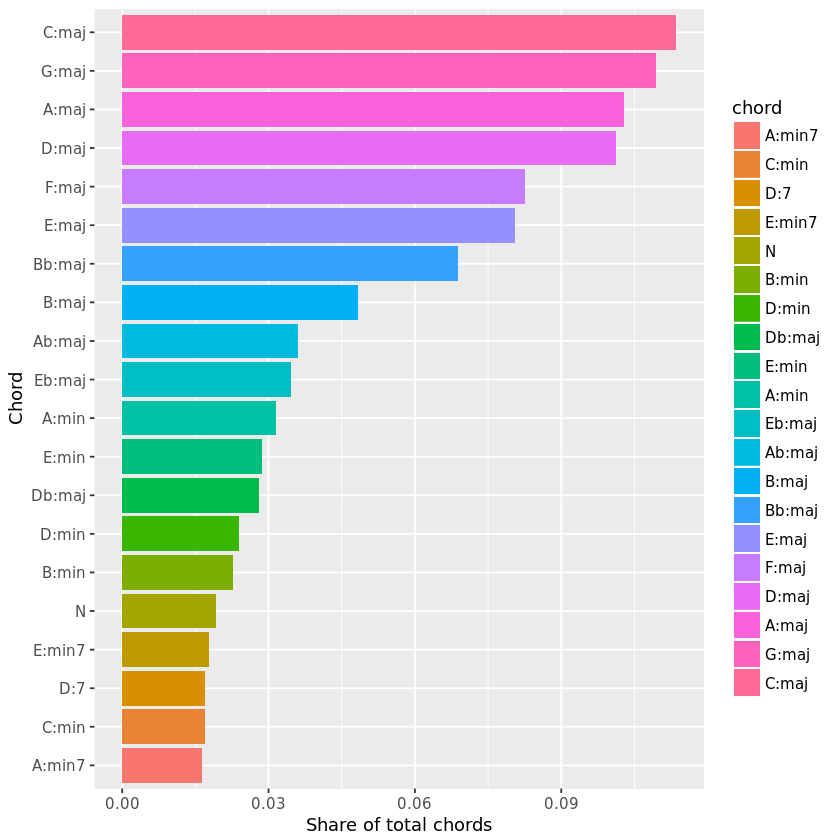

In [48]:
bb_count %>%
  slice(1:20) %>%
  mutate(share = n / sum(n),
         chord = reorder(chord, share)) %>%
  ggplot(aes(x = chord, y = share, fill = chord)) +
  geom_col()+
  coord_flip() +
  xlab("Chord") +
  ylab("Share of total chords") 

## 4. Chord "bigrams"
<p>Just as some chords are more common and more idiomatic than others, not all chord <em>progressions</em> are created equal. To look for common patterns in the structuring of chord progressions, we can use many of the same modes of analysis used in text-mining to analyze phrases. A chord change is simply a <em>bigram</em> — a two-"word" phrase — composed of a starting chord and a following chord. Here are the most common two-chord "phrases" in the McGill Billboard dataset.
To help you get your ear around some of these common progressions, here's a short audio clip containing some of the most common chord bigrams.
<br><br></p>
<audio controls src="http://assets.datacamp.com/production/project_79/img/bigrams.mp3">
  Your browser does not support the audio tag.
</audio>

In [50]:
# Wrangling and counting bigrams
bb_bigram_count <- bb %>%
    mutate(next_chord = lead(chord, 1), next_title = lead(title, 1), bigram =  str_c(chord, next_chord, sep = " ")) %>%
    filter(title == next_title) %>%
    count(bigram, sort = T)

# Displaying the first 20 rows of bb_bigram_count
head(bb_bigram_count, 20)

bigram,n
G:maj D:maj,241
C:maj F:maj,234
C:maj G:maj,217
B:maj E:maj,202
F:maj C:maj,195
A:maj E:maj,190
A:maj D:maj,189
D:maj G:maj,185
G:maj C:maj,185
D:maj A:maj,179


## 5. Visualizing the most common chord progressions
<p>We can get a better sense of just how popular some of these chord progressions are if we plot them on a bar graph. Note how the most common chord change, G major to D major, occurs more than twice as often than even some of the other top 20 chord bigrams.</p>

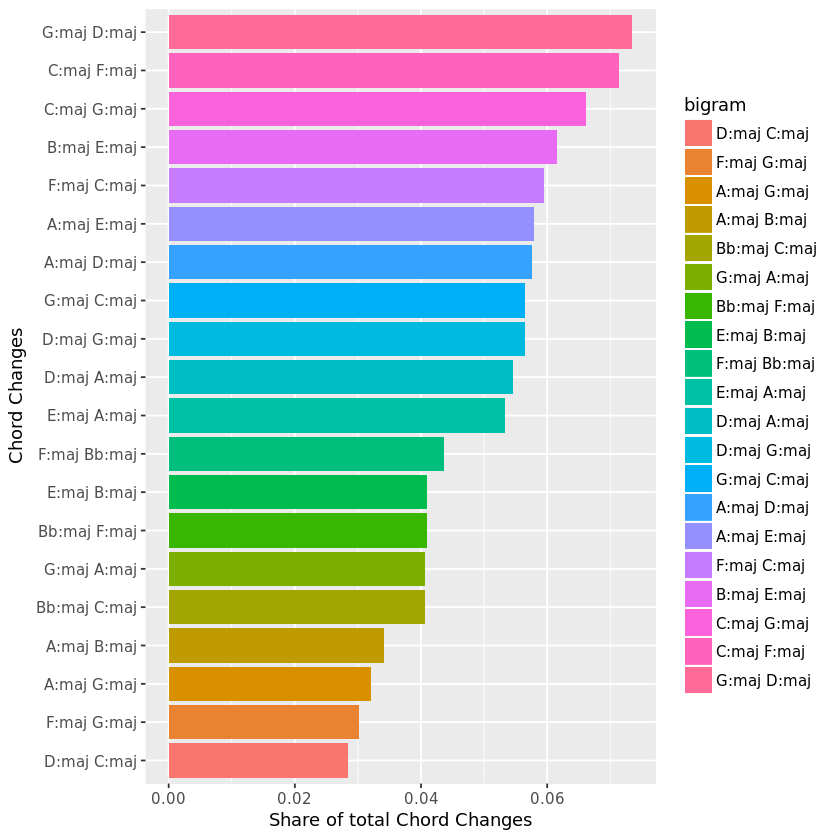

In [52]:
# Creating a column plot from `bb_bigram_count`
bb_bigram_count %>%
  slice(1:20) %>%
  mutate(share = n / sum(n),
         bigram = reorder(bigram, share)) %>%
  ggplot(aes(x = bigram, y = share, fill = bigram)) +
  geom_col()+
  coord_flip() +
  xlab("Chord Changes") +
  ylab("Share of total Chord Changes")

## 6. Finding the most common artists
<p>As noted above, the most common chords (and chord bigrams) are those that are easy to play on both the guitar and the piano. If the degree to which these chords are idiomatic on guitar or piano (or both) <em>determine</em> how common they are, we would expect to find the more idiomatic guitar chords (C, G, D, A, and E major) to be more common in guitar-driven songs, but we would expect the more idiomatic piano chords (C, F, G, D, and B-flat major) to be more common in piano-driven songs. (Note that there is some overlap between these two instruments.)</p>
<p>The McGill Billboard dataset does not come with songs tagged as "piano-driven" or "guitar-driven," so to test this hypothesis, we'll have to do that manually. Rather than make this determination for every song in the corpus, let's focus on just a few to see if the hypothesis has some validity. If so, then we can think about tagging more artists in the corpus and testing the hypothesis more exhaustively.</p>
<p>Here are the 30 artists with the most songs in the corpus. From this list, we'll extract a few artists who are obviously heavy on guitar or piano to compare.</p>

In [54]:
# Finding and displaying the 30 artists with the most songs in the corpus
bb_30_artists <- bb %>%
    select(artist, title) %>%
    unique() %>%
    count(artist, sort = T)

bb_30_artists %>%
  slice(1:30)

artist,n
Elvis Presley,13
Brenda Lee,9
Dion,8
Bob Seger,7
James Brown,7
Kenny Rogers,7
The Beatles,7
Chicago,6
Dr. Hook,6
Eric Clapton,6


## 7. Tagging the corpus
<p>There are relatively few artists in this list whose music is demonstrably "piano-driven," but we can identify a few that generally emphasize keyboards over guitar: Abba, Billy Joel, Elton John, and Stevie Wonder — totaling 17 songs in the corpus. There are many guitar-centered artists in this list, so for our test, we'll focus on three well known, guitar-heavy artists with a similar number of songs in the corpus: The Rolling Stones, The Beatles, and Eric Clapton (18 songs).</p>
<p>Once we've subset the corpus to only songs by these seven artists and applied the "piano" and "guitar" tags, we can compare the chord content of piano-driven and guitar-driven songs.</p>

In [56]:
tags <- tibble(
  artist = c('Abba', 'Billy Joel', 'Elton John', 'Stevie Wonder', 'The Rolling Stones', 'The Beatles', 'Eric Clapton'),
  instrument = c('piano', 'piano', 'piano', 'piano', 'guitar', 'guitar', 'guitar'))

# Creating a new dataframe `bb_tagged` that includes a new column `instrument` from `tags`
bb_tagged <- bb %>% inner_join(tags, by = 'artist')
    
bb_tagged

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist,instrument
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,F:maj,5,IV,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:maj,7,V,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,D:min,2,II,min,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,F:maj,5,IV,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:maj,7,V,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,C:maj,0,I,maj,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano
1984,G:min7,7,V,min7,aninnocentman,billyjoel,An Innocent Man,Billy Joel,piano


## 8. Comparing chords in piano-driven and guitar-driven songs
<p>Let's take a look at any difference in how common chords are in these two song groups. To clean things up, we'll just focus on the 20 chords most common in the McGill Billboard dataset overall.</p>
<p>While we want to be careful about drawing any conclusions from such a small set of songs, we can see that the chords easiest to play on the guitar <em>do</em> dominate the guitar-driven songs, especially G, D, E, and C major, as well as A major and minor. Similarly, "flat" chords (B-flat, E-flat, A-flat major) occur frequently in piano-driven songs, though they are nearly absent from the guitar-driven songs. In fact, the first and fourth most frequent piano chords are "flat" chords that occur rarely, if at all, in the guitar songs.</p>
<p>So with all the appropriate caveats, it seems like the instrument-based-harmony hypothesis does have some merit and is worth further examination.</p>

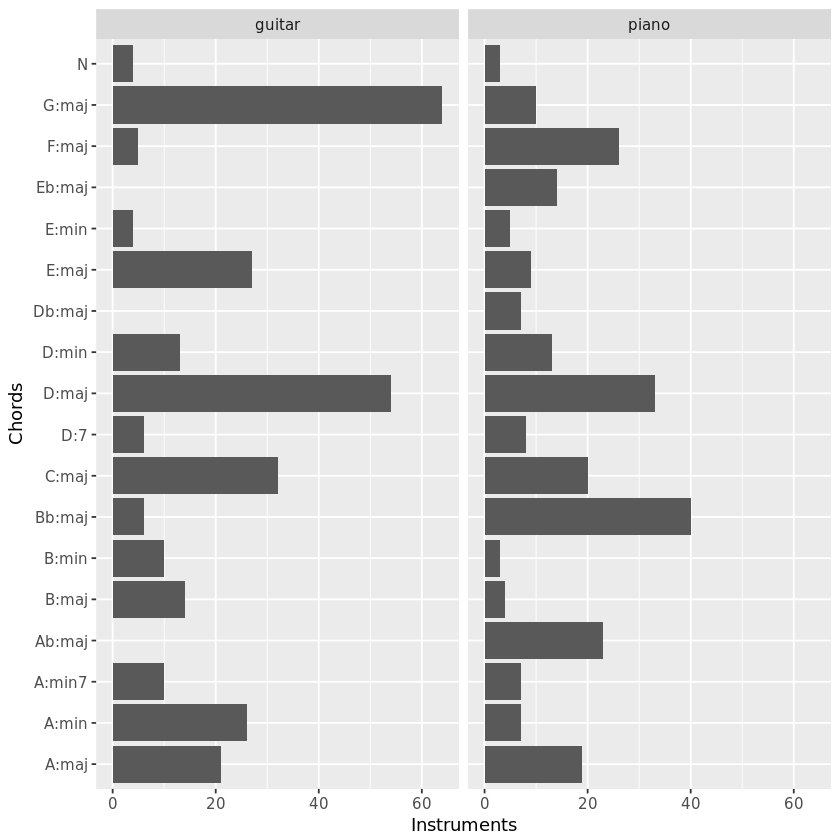

In [58]:
# The top 20 most common chords
top_20 <- bb_count$chord[1:20]

# Comparing the frequency of the 20 most common chords in piano- and guitar-driven songs
bb_tagged %>%
  filter(chord %in% top_20) %>%
  count(chord, instrument, sort = T) %>%
  ggplot(aes(x = chord, y = n))+
  geom_col()+
  coord_flip() +
  xlab("Chords") +
  ylab("Instruments") +
  facet_grid(~instrument)


## 9. Comparing chord bigrams in piano-driven and guitar-driven songs
<p>Since chord occurrence and chord bigram occurrence are naturally strongly tied to each other, it would not be a reach to expect that a difference in chord frequency would be reflected in a difference in chord bigram frequency. Indeed that is what we find.</p>

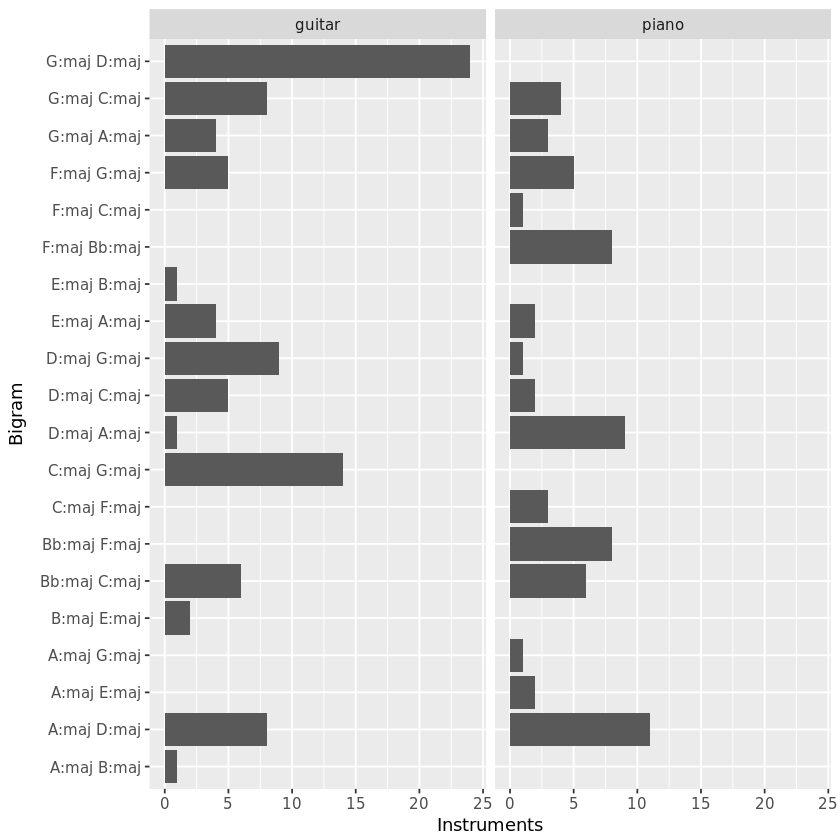

In [60]:
# The top 20 most common bigrams
top_20_bigram <- bb_bigram_count$bigram[1:20]

# Creating a faceted plot comparing guitar- and piano-driven songs for bigram frequency
bb_tagged %>%
mutate(next_chord = lead(chord, 1), next_title = lead(title, 1), bigram =  str_c(chord, next_chord, sep = " ")) %>%
    filter(title == next_title) %>%
    count(bigram,instrument, sort = T) %>%
    filter(bigram %in% top_20_bigram)%>%
   ggplot(aes(x = bigram, y = n))+
  geom_col()+
  coord_flip() +
  xlab("Bigram") +
  ylab("Instruments") +
  facet_grid(~instrument)

## 10. Conclusion
<p>We set out asking if the degree to which a chord is "idiomatic" on an instrument affects how frequently it is used by a songwriter. It seems that is indeed the case. In a large representative sample of pop/rock songs from the historical Billboard charts, the chords most often learned first by guitarists and pianists are the most common. In fact, chords commonly deemed <em>easy</em> or <em>beginner-friendly</em> on <strong>both</strong> piano and guitar are far and away the most common in the corpus.</p>
<p>We also examined a subset of 35 songs from seven piano- and guitar-heavy artists and found that guitarists and pianists tend to use different sets of chords for their songs. This was an extremely small (and likely not representative) sample, so we can do nothing more than hypothesize that this trend might carry over throughout the larger dataset. But it seems from this exploration that it's worth a closer look.</p>
<p>There are still more questions to explore with this dataset. What about band-driven genres like classic R&amp;B and funk, where artists like James Brown and Chicago build chords from a large number of instruments each playing a single note? What about "progressive" bands like Yes and Genesis, where "easy" and "idiomatic" may be less of a concern during the songwriting process? And what if we compared this dataset to a collection of chords from classical songs, jazz charts, folk songs, liturgical songs?</p>
<p>There's only one way to find out!</p>

In [62]:
# Set to TRUE or FALSE to reflect your answer.
hypothesis_valid <- TRUE

# Set to TRUE or FALSE to reflect your answer.
more_data_needed <- TRUE